# Support Vector Machine


## Step#01 Import necessary libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

## Step#02 Create and check datasets

In [25]:
df, value = make_circles(n_samples = 500,
                        noise = .05, factor = .5)

In [26]:
print(df, value)

[[ -5.59175114e-01  -1.09231486e-01]
 [  9.22931121e-01   4.79836801e-01]
 [ -4.76768524e-01  -1.88749502e-01]
 [ -4.85228731e-01  -1.70004360e-01]
 [ -3.40328583e-01   5.00623920e-01]
 [  9.07039181e-01   1.69606969e-01]
 [ -3.38296079e-01  -4.10398634e-01]
 [ -3.64695670e-01  -3.73370911e-01]
 [  1.02854996e+00  -2.12615241e-01]
 [  1.73221557e-01  -9.85074090e-01]
 [  4.15526113e-01  -1.31915449e-01]
 [ -3.69622668e-01  -3.65452329e-01]
 [ -1.37863797e-01   4.68198196e-01]
 [  5.55759891e-01  -7.63594203e-01]
 [ -2.35359112e-01  -9.79747041e-01]
 [  4.47789428e-01   2.28259963e-01]
 [ -3.53700229e-01   3.76741294e-01]
 [  3.05569753e-02  -1.09876289e+00]
 [ -3.20343670e-01  -9.70269731e-01]
 [ -3.66322470e-01  -9.47695312e-01]
 [  7.89336040e-02  -4.70076730e-01]
 [ -1.01709439e+00  -4.35387725e-02]
 [  4.07286671e-01  -3.24308991e-01]
 [ -1.38464327e-01   5.39636820e-01]
 [  3.91765915e-01  -1.94955890e-01]
 [ -7.50824863e-01   6.78134574e-01]
 [ -1.04468553e-01   1.08332723e+00]
 

## Step#03 Plot dataset  

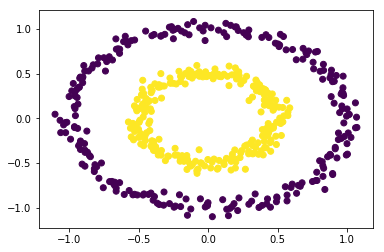

In [27]:
plt.scatter(df[:, 0], df[:, 1], c=value)
plt.show()

## Step#04 Train and test the model

In [28]:
x = df[:, 0]
y = df[:, 1]
z = x**2 + y**2
kernals = ['linear', 'poly', 'rbf']
training_set = np.c_[x, y]
for kernal in kernals:
    clf = svm.SVC(kernel = kernal, gamma = 2)
    clf.fit(training_set, value)
    prediction = clf.predict([[-0.4, -0.4]])
    print(prediction)

[1]
[1]
[1]


## Step#05 Plot kernal

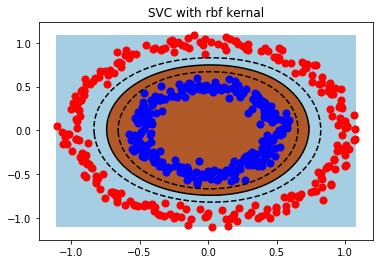

In [29]:
X = training_set
y = value
X0 = X[np.where(y == 0)]
X1 = X[np.where(y == 1)]
plt.figure()
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
XX, YY = np.mgrid[x_min:x_max:200j,
                 y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(),
                               YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0,
              cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
           linestyles=['--', '-', '--'],
           levels = [-.5, 0, .5])
plt.scatter(X0[:, 0], X0[:, 1], c = 'r', s=50)
plt.scatter(X1[:, 0], X1[:, 1], c = 'b', s=50)
title = ('SVC with {} kernal').format(kernal)
plt.title(title)
plt.show()